In [1]:
from pathlib import Path
import numpy as np
import logging

import pyvista as pv
pv.set_jupyter_backend("pythreejs")

from project_heart.enums import *
from project_heart.lv import LV

In [2]:
filepath = Path("C:/Users/igorp/Downloads/0.3_80.00_50.00_LVIDEAL_HEX20.xplt")
# filepath = Path("C:/Users/igornobrega/Downloads/0.3_80.00_50.00_LVIDEAL_HEX20.xplt")

# Load File and Create Speckles

In [3]:
lv = LV.from_file(filepath, log_level=logging.DEBUG)
lv.identify_regions(LV_GEO_TYPES.IDEAL,
    apex_base_args={"ab_ql":0.03, "ab_qh":0.90},
    endo_epi_args={"threshold":85,})
lv.plot("mesh", 
        scalars=LV_MESH_DATA.SURFS,
        container="points",
        show_edges=True,
        categorical=True,
        split_sharp_edges=True,
        smooth_shading=False,
        pretty=False,
        vnodes=[
            (LV_VIRTUAL_NODES.BASE, "red"),
            (LV_VIRTUAL_NODES.APEX, "red")
            ],
        )

Renderer(camera=PerspectiveCamera(aspect=1.3333333333333333, children=(DirectionalLight(position=(50000.000000…

# Compute Metric

Using some subset for numerical validation

Expected values for timesteps [0, 0.1 and 1.1]:

- Endo (approx):    25,  17,  17.5
- Epi (approx):     35,  32,  32
- Mean:             30,  24.5,  24.75

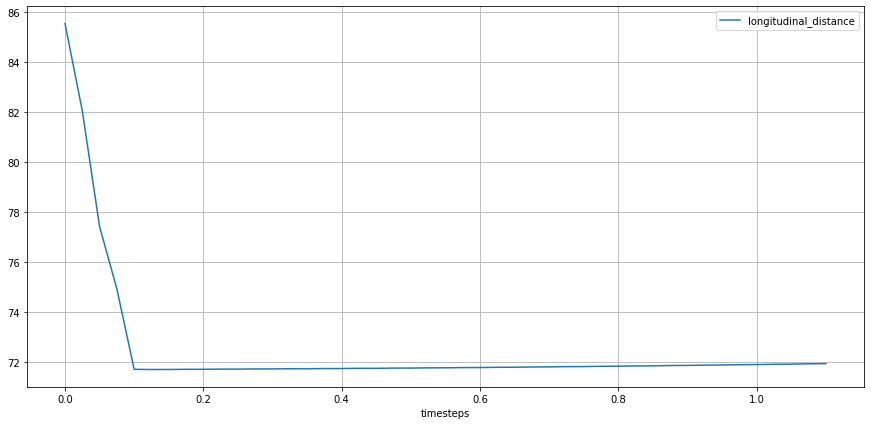

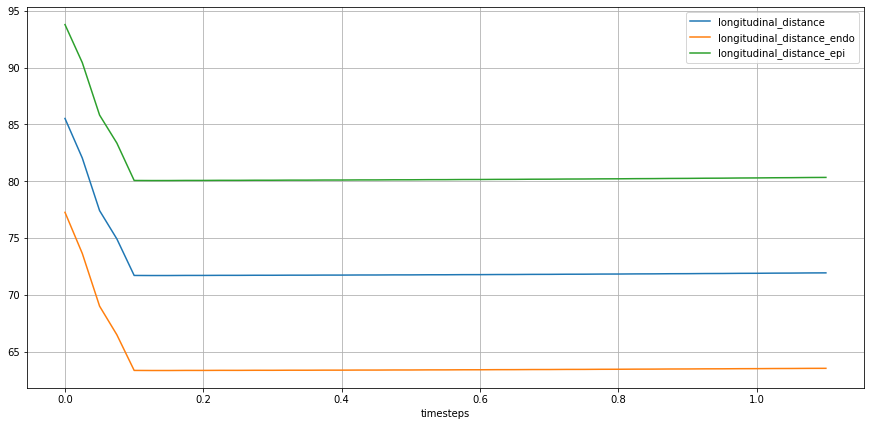

In [5]:
lv.longitudinal_distances(nodesets = {lv.REGIONS.ENDO, lv.REGIONS.EPI})
lv.plot_metric(lv.STATES.LONG_DISTS, kind="line", search_suffix={lv.REGIONS.ENDO, lv.REGIONS.EPI})